In [91]:
import glob
# from glob import glob
# import obspy
import numpy as np

import pandas as pd

import pyrotd
# from obspy import read
import matplotlib.pyplot as plt

## Path link:
path = "E://I-Lan-Data_2022//20180206155041"
#
files = glob.glob(path + '//*.txt') # all files detect

In [65]:
# 
# for ii, filename in enumerate (onlyfiles):
#     print(ii)
#     filename = onlyfiles[ii]
#     fdata = pd.read_csv(
#     filename,
#     skiprows=11,
#     delim_whitespace=True,
#     names=['time','Z','N','E']
# )
    

D:\PVB\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)
D:\PVB\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


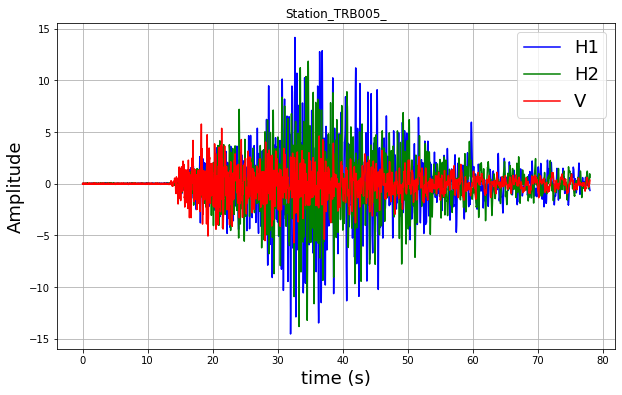

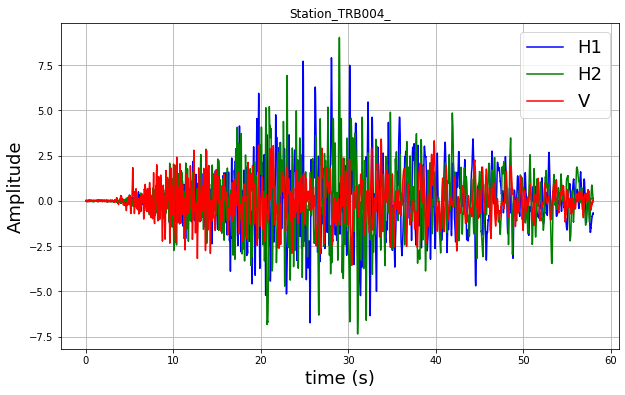

In [83]:
# Loop for files:
for i in range (0,2):
    fn = files[i] # fake the file name into structres
    # Load the header of file:
    header = pd.read_csv(fn, nrows = 10, delimiter=": ",index_col=1)
    # Load the timeseries
    data = pd.read_csv(fn,delim_whitespace=True,skiprows=11,index_col=False,names=["t","V","H1","H2"])
    data.columns
    time = data.t # time
    vg = data.V   # Z component
    ug1 = data.H1 # E component
    ug2 = data.H2 # H component
    #    print(fn)
    #  plot impulse response of SDOF
    fig, ax = plt.subplots( nrows=1, ncols=1, figsize=(10,6))  # create figure & 1 axis
    ax.plot(time,ug1,'b-', label='H1')
    ax.plot(time,ug2,'g-',  label='H2')
    ax.plot(time,vg,'r-', label='V')
    ax.set_xlabel('time (s)', fontsize=18)
    ax.set_ylabel('Amplitude', fontsize=18)
    ax.legend(fontsize=18)
    ax.grid(which='both')
    #plt.ylim((-1,1))
#    print(header.index[7])
    ax.set_title("Station_"+header.index.name+"_")
    fig.savefig(fn+".png")   # save the figure to file.
#    plt.close(fig)    # close the figure window


In [87]:
sta_code_str = []
Nrec = 100
# create dataframe-0 containing the station code
for i in range (0,Nrec):
    fn = files[i]
    header = pd.read_csv(fn,nrows = 6, delimiter = ": ", index_col=0).T
    sta_code_str.append(header.index[0])
# sta_code_str

In [92]:
# specify the time step and damping ratio 
time_step = 0.01
osc_damping = 0.05
    
# Specify frequency range
osc_freqs = np.logspace(-1, 2, 91)


# create dataframe-1 containing the spectral acclereation
col_names1 = ['StaLat','StaLon','EqLat','EqLon','Mag','Depth']


# create dataframe-2 containing the spectral acclereation
col_names2 = [str(a) + " Hz" for a in osc_freqs]
    
col_names_all = col_names1 + col_names2

df_rot_psa = pd.DataFrame(columns=col_names_all)

Now running record number 0


D:\PVB\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


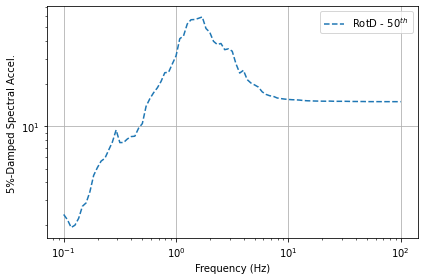

In [94]:
# Loop for files:
Nrec = 1
for i in range (0, Nrec):
    
    print("Now running record number {}".format(i))
    
    fn = files[i] # fake the file name into structres
    # Load the header of file:
    header = pd.read_csv(fn, nrows = 6, delimiter=": ",index_col=0).T
    # Load the timeseries
    data = pd.read_csv(fn,delim_whitespace=True,skiprows=11,index_col=False,names=["t","V","H1","H2"])
   
    time = data.t # time
#     vg = data.V   # Z component
    ug1 = data.H1 # E component
    ug2 = data.H2 # H component
    
# earthquake information   
    eq_info = np.stack([header[v_n] for v_n in header], axis=1).reshape(-1)
    
#     df_eq_info.loc[i] = eq_info
    
#     Compute the acceleration response spectrum 
#     psa_ug1 = pyrotd.calc_spec_accels(time_step, ug1, osc_freqs, osc_damping)
#     psa_ug2 = pyrotd.calc_spec_accels(time_step, ug2, osc_freqs, osc_damping)
    
    rot_psa = pyrotd.calc_rotated_spec_accels(
                 time_step, ug1, ug2, osc_freqs, osc_damping, percentiles= [50])

    tempt =  np.concatenate([eq_info, rot_psa.spec_accel])
    
    df_rot_psa.loc[i] = tempt
    
# Create a plot!
    fig, ax = plt.subplots()
#     ax.plot(psa_ug1.osc_freq, psa_ug1.spec_accel,'b')
#     ax.plot(psa_ug2.osc_freq, psa_ug2.spec_accel,'c')
# ax.plot(rot_psa.osc_freq,rot_psa.spec_accel)

    for percentile in np.unique(rot_psa.percentile):
        selected = rot_psa[rot_psa.percentile == percentile]
        ax.plot(selected.osc_freq, selected.spec_accel, 
            linestyle='--', label='RotD - %d$^{th}$' % percentile)
    
    ax.set(
    xlabel='Frequency (Hz)', xscale='log', alpha=0.8,
    ylabel='5%-Damped Spectral Accel.', yscale='log',
        )
    ax.legend()
    ax.grid()
    fig.tight_layout()